In [1]:
import  numpy as np
import pandas as pd
import sklearn
import statistics
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
np.tile([[1,0],[1,0]],(4,4))

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [3]:
titanic=sns.load_dataset('titanic')

In [4]:
titanic = pd.read_csv('titanic.csv')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='survived', ylabel='count'>

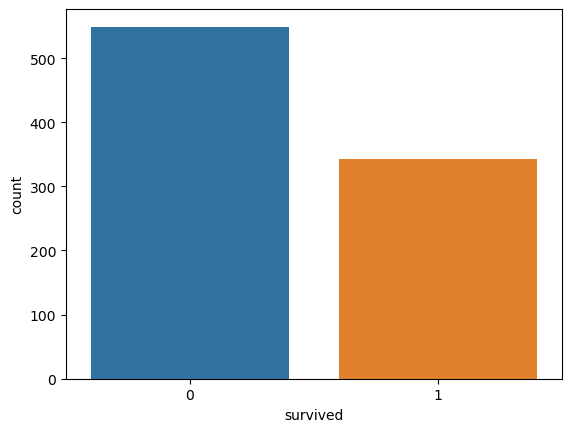

In [6]:
sns.countplot(x='survived',data=titanic)

In [7]:

from pandas_profiling import ProfileReport
tips = sns.load_dataset('tips')
profile = ProfileReport(tips,explorative=True)
profile.to_file("tips-eda.html")

ModuleNotFoundError: No module named 'pandas_profiling'

# Data Wrangling

In [8]:
titanic.isnull().any().sum()

4

In [9]:
titanic.dropna(inplace=True)

In [10]:
titanic.shape[0]

182

# Pre processings

In [11]:
sex = pd.get_dummies(titanic['sex'],drop_first=True)
sex[:5]

,male
1,0
3,0
6,1
10,0
11,0


In [12]:
embark=pd.get_dummies(titanic['embarked'],drop_first=True)
embark[:5]

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [13]:
cl=pd.get_dummies(titanic['pclass'],drop_first=True)
cl[:5]

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [14]:
titanic = pd.concat([titanic,sex,cl,embark],axis=1)

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,male,2,3,Q,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,0,0,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,0,0,0,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,0,0,0,0,1


In [16]:
titanic.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'male', 2, 3, 'Q', 'S'], dtype=object)

In [17]:
titanic.drop(["pclass","sex","embarked","class","who","adult_male","deck","embark_town","alive","alone"],axis=1,inplace=True)

In [18]:
titanic.head()

,survived,age,sibsp,parch,fare,male,2,3,Q,S
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,0,0,1


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = titanic.drop('survived',axis=1)
y = titanic['survived']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.70,random_state=101)

In [21]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions = lr.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [23]:

predictions[:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [24]:
np.array(y[:5])

array([1, 1, 0, 1, 1], dtype=int64)

In [25]:
np.array(y[:5])

array([1, 1, 0, 1, 1], dtype=int64)

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54        41
           1       0.78      0.85      0.81        87

    accuracy                           0.73       128
   macro avg       0.69      0.67      0.68       128
weighted avg       0.72      0.73      0.73       128



In [27]:
accuracy_score(y_test,predictions)*100

73.4375

In [34]:
lr.predict([[52,1,0,90,0,0,0,0,0]])

array([1], dtype=int64)